In [6]:
install.packages("carData")


The downloaded binary packages are in
	/var/folders/gw/_b7068311jd2q235lxldcq4w0000gn/T//Rtmph0s8Mu/downloaded_packages


In [102]:
library("rcompanion")
library("car")
library("multcomp")
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [101]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/gw/_b7068311jd2q235lxldcq4w0000gn/T//Rtmph0s8Mu/downloaded_packages


In [103]:
data1 <- read.csv("Dataset_Final_Project.csv")

In [104]:
head(data1)

,X,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,0,6,148,72,35,0,33.6,0.627,50,1,254163
2,1,1,85,66,29,0,26.6,0.351,31,0,717276
3,2,8,183,64,0,0,23.3,0.672,32,1,578356
4,3,1,89,66,23,94,28.1,0.167,21,0,882563
5,4,0,137,40,35,168,43.1,2.288,33,1,830916
6,5,5,116,74,0,0,25.6,0.201,30,0,214328


In [105]:
data1$Pregnancies[data1$Pregnancies <=3 ] <- 1

data1$Pregnancies[data1$Pregnancies > 4 & data1$Pregnancies <= 8] <- 2

data1$Pregnancies[data1$Pregnancies > 8 & data1$Pregnancies <= 12] <- 3

data1$Pregnancies[data1$Pregnancies > 12 & data1$Pregnancies <= 17] <- 4

In [106]:
head(data1)

,X,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,0,2,148,72,35,0,33.6,0.627,50,1,254163
2,1,1,85,66,29,0,26.6,0.351,31,0,717276
3,2,2,183,64,0,0,23.3,0.672,32,1,578356
4,3,1,89,66,23,94,28.1,0.167,21,0,882563
5,4,1,137,40,35,168,43.1,2.288,33,1,830916
6,5,2,116,74,0,0,25.6,0.201,30,0,214328


In [107]:
str(data1$Pregnancies)

 num [1:768] 2 1 2 1 1 2 1 3 1 2 ...


In [108]:
#Change it to factors 

In [109]:
data1$Pregnancies <- as.factor(data1$Pregnancies)

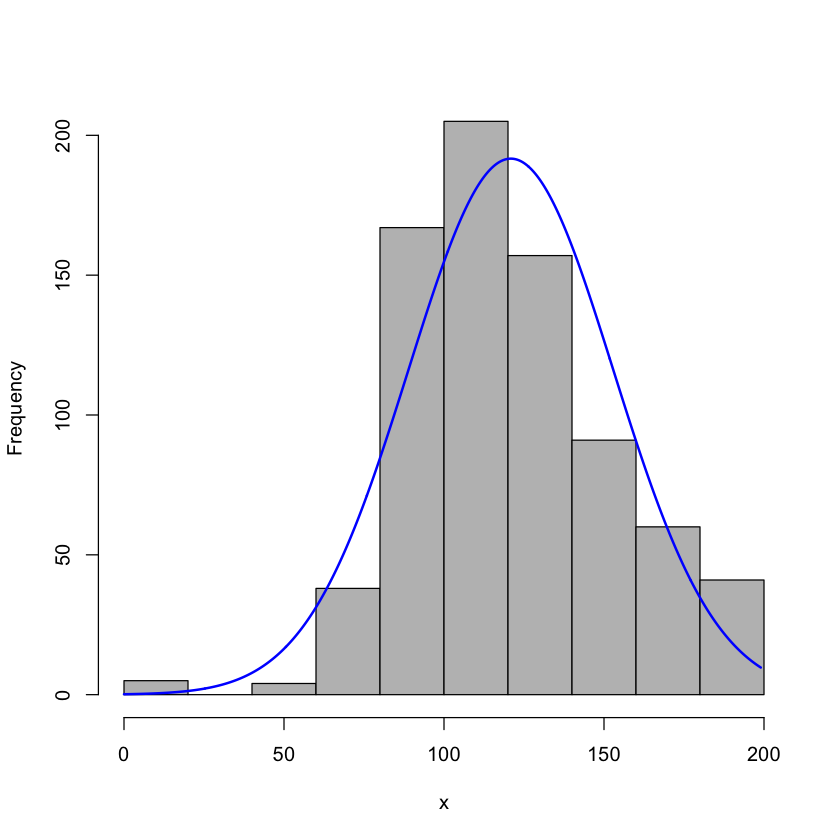

In [110]:
plotNormalHistogram(data1$Glucose)

In [111]:
#It needs to be more nromal so we will run another test


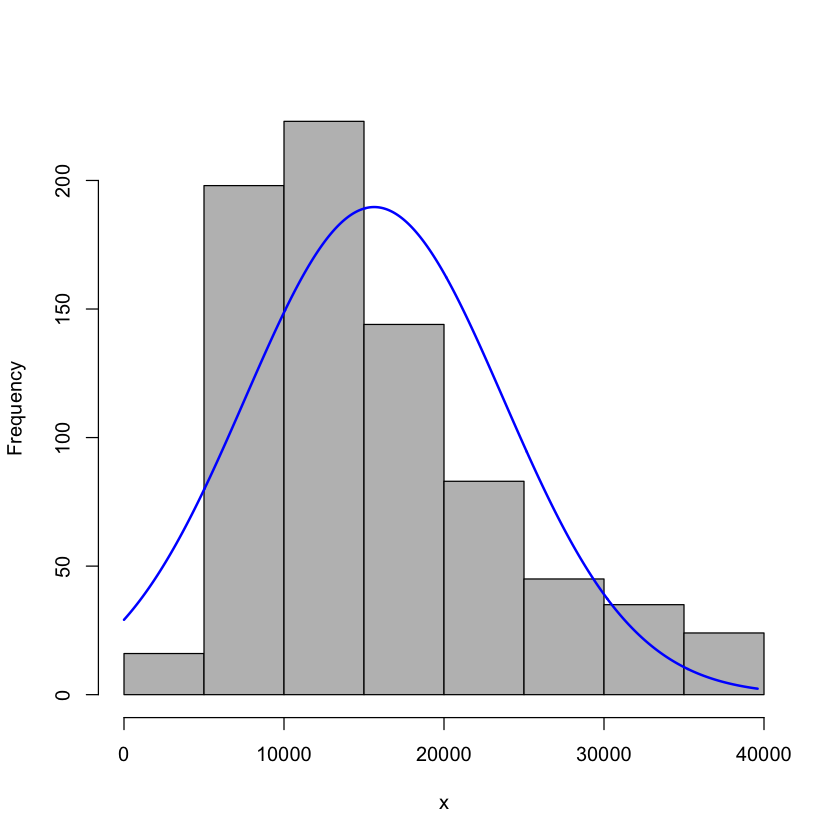

In [112]:
data1$GlucoseSQRT <- data1$Glucose * data1$Glucose
plotNormalHistogram(data1$GlucoseSQRT)

In [113]:
##DIDNOT make it any better

In [114]:
leveneTest(GlucoseSQRT~Pregnancies, data=data1)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.500501,0.05833969
,764,NA,NA


In [115]:
#It is NOT significant so it passed the homogeneity test

In [117]:
Homogeneity_RegrSlp = lm(GlucoseSQRT~BMI, data=data1)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BMI,1,2565952537,2565952537,41.3993,2.185779e-10
Residuals,766,47477121028,61980576,NA,NA


In [118]:
##The the result does not meet the assumption of homogeneity since the p valuce is significant

In [119]:
##Lets try and change the co-variant to Outcome 

In [120]:
str(data1$Outcome)

 int [1:768] 1 0 1 0 1 0 1 0 1 1 ...


In [121]:
#it is an integer so needs to be turn into a factor 

In [122]:
data1$Outcome <- as.factor(data1$Outcome)

In [123]:
Homogeneity_RegrSlp = lm(GlucoseSQRT~Outcome, data=data1)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Outcome,1,11710264264,11710264264,234.0048,2.70431e-46
Residuals,766,38332809301,50042832,NA,NA


In [124]:
##This is also significant and cannot be used as a co-variant 

In [125]:
##We can try Diabetes Pedigree function as one of the co-variant. Since it is a continuous variable we do not need to change it into factor 

In [126]:
##We need to check the homogeniety of Diabetes Pedigree function 


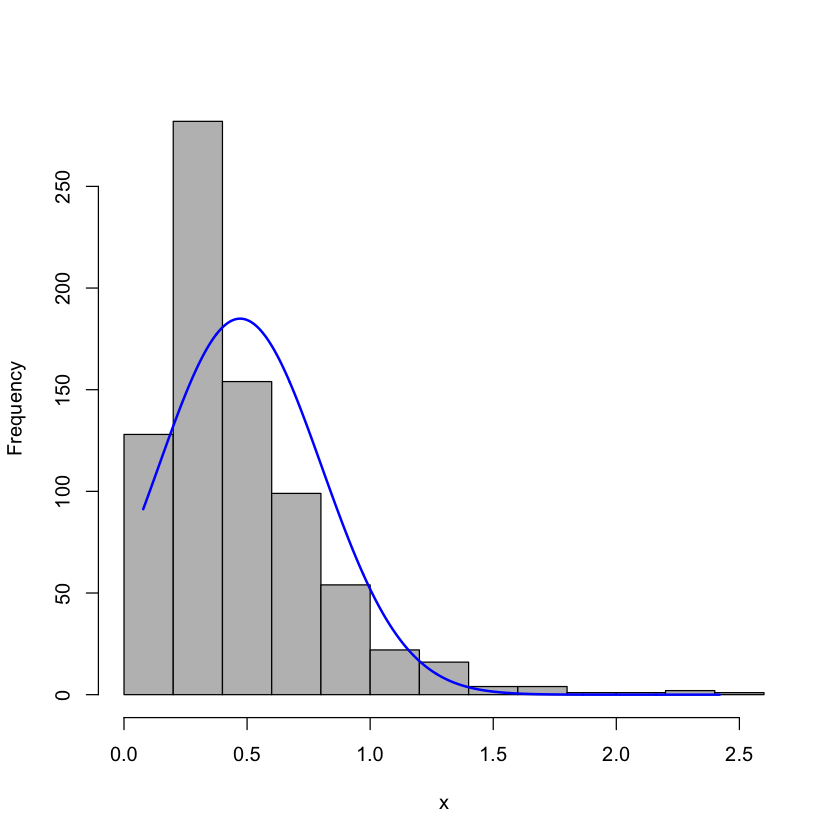

In [127]:
plotNormalHistogram(data1$DiabetesPedigreeFunction)

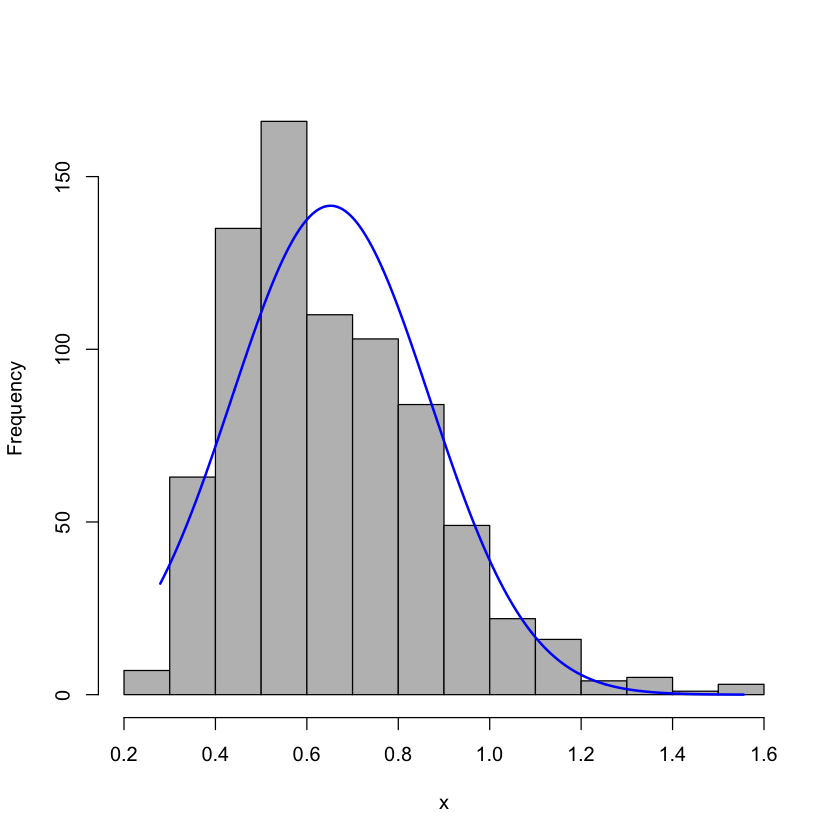

In [129]:
data1$DiabetesPedigreeFunction_SQRT <- sqrt(data1$DiabetesPedigreeFunction)
plotNormalHistogram(data1$DiabetesPedigreeFunction_SQRT)

In [130]:
data1$DiabetesPedigreeFunction_LOG <- log(data1$DiabetesPedigreeFunction)

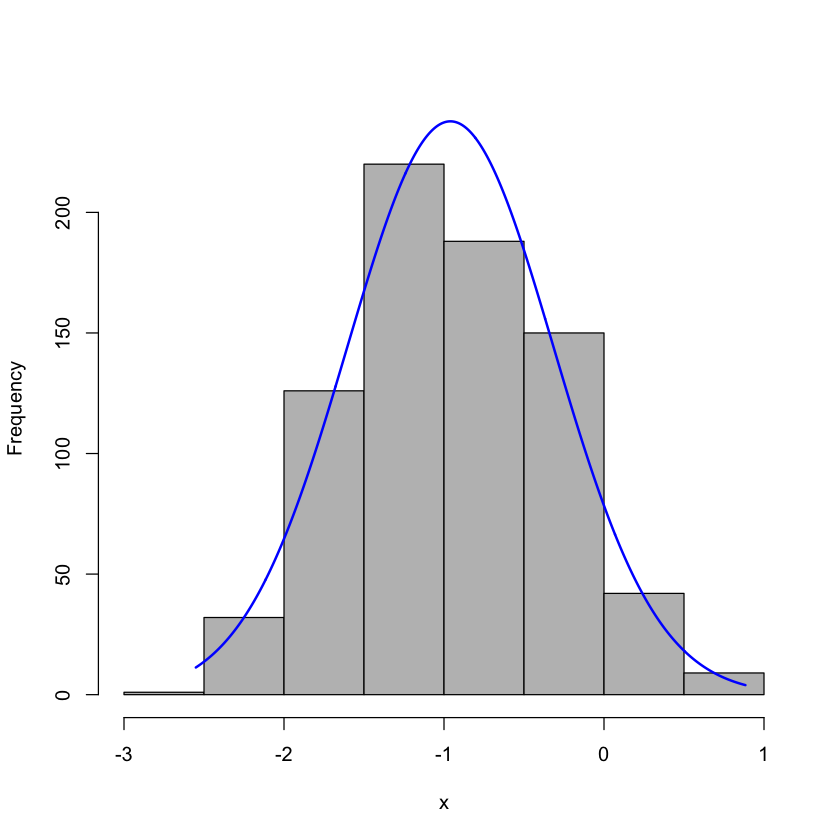

In [131]:
plotNormalHistogram(data1$DiabetesPedigreeFunction_LOG)

In [132]:
##That looks very good so we can now do our levens test and test of homogeity

In [133]:
Homogeneity_RegrSlp = lm(GlucoseSQRT~DiabetesPedigreeFunction_LOG, data=data1)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
DiabetesPedigreeFunction_LOG,1,751997373,751997373,11.68629,0.0006629005
Residuals,766,49291076192,64348663,NA,NA


In [134]:
##This one is also significant and hence cannot be used as a co-variant 

In [135]:
##Testing for BloodPressure

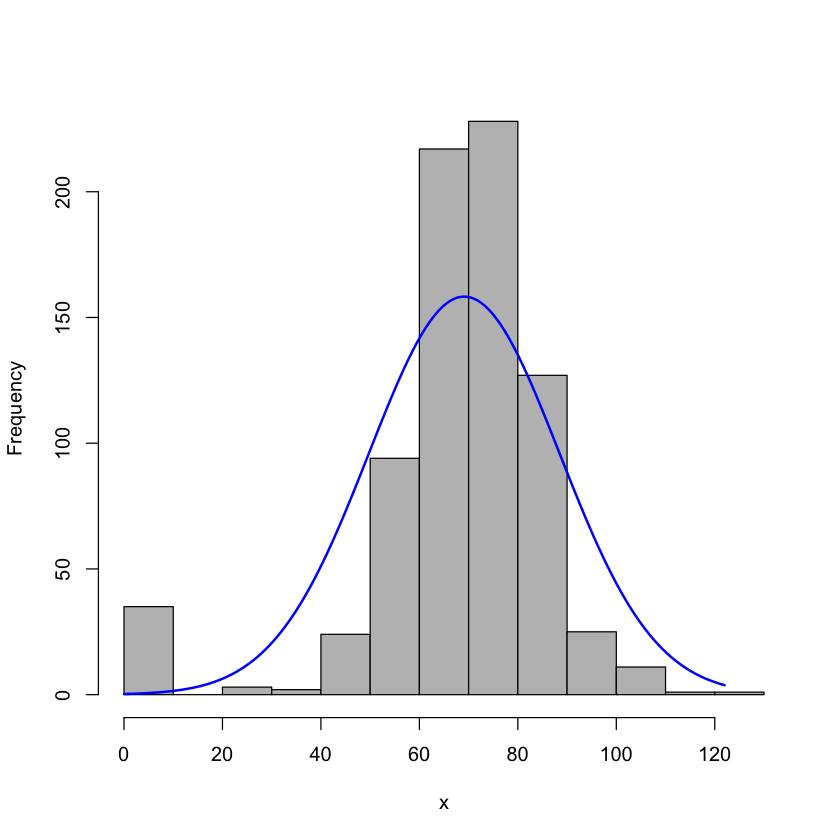

In [136]:
plotNormalHistogram(data1$BloodPressure)

In [137]:
#Pretty Normal curve so do NOT need to fix anything 

In [138]:
Homogeneity_RegrSlp = lm(BloodPressure~DiabetesPedigreeFunction_LOG, data=data1)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
DiabetesPedigreeFunction_LOG,1,661.3426,661.3426,1.767006,0.1841488
Residuals,766,286693.1145,374.2730,NA,NA


In [139]:
##If we choose as BloodPRessure as dependent variable and DiabetesPedigreeFunction as a covariant it passes the homogeity test 

In [152]:
ANCOVA =lm (BloodPressure~DiabetesPedigreeFunction_LOG + Pregnancies*DiabetesPedigreeFunction, data=data1)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
DiabetesPedigreeFunction_LOG,1,6.613426e+02,661.342570,1.807134120,1.792540e-01
Pregnancies,3,8.200743e+03,2733.581118,7.469574666,6.221502e-05
DiabetesPedigreeFunction,1,2.911776e+00,2.911776,0.007956497,9.289471e-01
Pregnancies:DiabetesPedigreeFunction,3,7.242369e+02,241.412290,0.659664758,5.770439e-01
Residuals,759,2.777652e+05,365.962085,NA,NA


In [153]:
postHocs <- glht(ANCOVA,linfct=mcp(Pregnancies = "Tukey"))
summary(postHocs)

Warning message in mcp2matrix(model, linfct = linfct):
“covariate interactions found -- default contrast might be inappropriate”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = BloodPressure ~ DiabetesPedigreeFunction_LOG + Pregnancies * 
    DiabetesPedigreeFunction, data = data1)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)  
2 - 1 == 0   8.8262     3.1232   2.826   0.0236 *
3 - 1 == 0   5.1316     4.2928   1.195   0.6195  
4 - 1 == 0   4.8190     3.8368   1.256   0.5805  
3 - 2 == 0  -3.6945     4.7766  -0.773   0.8612  
4 - 2 == 0  -4.0072     4.4148  -0.908   0.7936  
4 - 3 == 0  -0.3127     5.3045  -0.059   0.9999  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)
